In [1]:
import pandas as pd
import requests
import json
import time
from time import sleep
import datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from psycopg2 import connect
from sqlalchemy import create_engine
import mysql.connector as sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dash.dependencies import Input, Output

In [2]:
url = 'https://api-datalab.coderslab.com'

headers = {
    'accept': 'application/json',
    'authorization': 'iKRsQ8vdqgT903o2vH1rsejOeQ0F7YC9TvutH6Wk'
}

In [3]:
airports= pd.read_csv(
                    r'C:/Users/m.owczarek/coderslab/project/data/airports.csv', 
                    sep=';', 
                    decimal='.' 
)
airports.head()

,origin_airport_id
0,10874
1,11233
2,13360
3,15008
4,11638


In [4]:
airport_data = []

for airport_id in airports['origin_airport_id']:
    response = requests.get(f'{url}/api/v2/airport/{airport_id}', headers= headers)
    time.sleep(5)
    if response.status_code == 200:
        response = json.loads(response.text)
        airport_data.append(response)
        print(f'{url}/api/v2/airport/{airport_id}')
    else:
        continue
        print(f"Failed to fetch data. Response code: {response.status_code}")
        
airport_df = pd.DataFrame.from_records(airport_data)
airport_df.head()

https://api-datalab.coderslab.com/api/v2/airport/11638
https://api-datalab.coderslab.com/api/v2/airport/13342
https://api-datalab.coderslab.com/api/v2/airport/13244
https://api-datalab.coderslab.com/api/v2/airport/15096
https://api-datalab.coderslab.com/api/v2/airport/10397
https://api-datalab.coderslab.com/api/v2/airport/10529
https://api-datalab.coderslab.com/api/v2/airport/10140
https://api-datalab.coderslab.com/api/v2/airport/10792
https://api-datalab.coderslab.com/api/v2/airport/10599
https://api-datalab.coderslab.com/api/v2/airport/14831
https://api-datalab.coderslab.com/api/v2/airport/13931
https://api-datalab.coderslab.com/api/v2/airport/11292
https://api-datalab.coderslab.com/api/v2/airport/11259
https://api-datalab.coderslab.com/api/v2/airport/11996
https://api-datalab.coderslab.com/api/v2/airport/11995
https://api-datalab.coderslab.com/api/v2/airport/15016
https://api-datalab.coderslab.com/api/v2/airport/14730
https://api-datalab.coderslab.com/api/v2/airport/12264
https://ap

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME
0,11638,Fresno Air Terminal,"Fresno, CA","FRESNO YOSEMITE INTERNATIONAL, CA US"
1,13342,General Mitchell Field,"Milwaukee, WI","MILWAUKEE MITCHELL AIRPORT, WI US"
2,13244,Memphis International,"Memphis, TN","MEMPHIS INTERNATIONAL AIRPORT, TN US"
3,15096,Syracuse Hancock International,"Syracuse, NY","SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US"
4,10397,Atlanta Municipal,"Atlanta, GA",ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...


In [5]:
airport_df.to_csv(
    r'C:\Users\m.owczarek\coderslab\project\data\raw\airport_list.csv',
    sep=';',
    decimal='.',
    index=False
)

In [6]:
start_date = datetime(2019, 1, 1)
end_date = datetime(2020, 3, 31)

weather_data = []
current_date = start_date
while current_date <= end_date:
    time.sleep(1)
    date_str = current_date.strftime('%Y-%m-%d')
    print(f"Downloading weather data for the month {date_str}")
        
    try:
        response = requests.get(
            f"https://api-datalab.coderslab.com/api/v2/airportWeather?date={date_str}",
            headers=headers,
        )
        if response.status_code == 200:
            response = response.json()
            for record in response:
                weather_data.append(record)
        else:
            print(f"Error while downloading weather data for the month {date_str}. Response code: {r.status_code}.")
    finally:
        current_date += relativedelta(months=1)


airport_weather_df = pd.DataFrame.from_records(weather_data)
airport_weather_df.head()

,WT18,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,...,PGTM,WT10,WESD,SN32,SX32,PSUN,TSUN,TOBS,WT07,WT11
0,None,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,4.70,0.14,0.0,0.0,64.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,4.92,0.57,0.0,0.0,56.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,5.37,0.15,0.0,0.0,52.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,12.08,1.44,0.0,0.0,56.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,13.42,0.00,0.0,0.0,49.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
airport_weather_df.to_csv(
    r'C:\Users\m.owczarek\coderslab\project\data\raw\airport_weather.csv',
    sep=';',
    decimal='.',
    index=False
)

In [8]:
response = requests.get(f'{url}/api/v2/aircraft', headers=headers)
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Failed to fetch data. Response code: {response.status_code}")
    
aircraft_df = pd.DataFrame.from_records(data)
aircraft_df.head()

[{'MANUFACTURE_YEAR': 1944, 'TAIL_NUM': 'N54514', 'NUMBER_OF_SEATS': 0}, {'MANUFACTURE_YEAR': 1945, 'TAIL_NUM': 'N1651M', 'NUMBER_OF_SEATS': 0}, {'MANUFACTURE_YEAR': 1953, 'TAIL_NUM': 'N100CE', 'NUMBER_OF_SEATS': 0}, {'MANUFACTURE_YEAR': 1953, 'TAIL_NUM': 'N141FL', 'NUMBER_OF_SEATS': 0}, {'MANUFACTURE_YEAR': 1953, 'TAIL_NUM': 'N151FL', 'NUMBER_OF_SEATS': 0}, {'MANUFACTURE_YEAR': 1953, 'TAIL_NUM': 'N381FL', 'NUMBER_OF_SEATS': 0}, {'MANUFACTURE_YEAR': 1954, 'TAIL_NUM': 'N6174C', 'NUMBER_OF_SEATS': 0}, {'MANUFACTURE_YEAR': 1954, 'TAIL_NUM': 'N400UA', 'NUMBER_OF_SEATS': 0}, {'MANUFACTURE_YEAR': 1955, 'TAIL_NUM': 'N747CE', 'NUMBER_OF_SEATS': 2}, {'MANUFACTURE_YEAR': 1955, 'TAIL_NUM': 'N9148F', 'NUMBER_OF_SEATS': 0}, {'MANUFACTURE_YEAR': 1955, 'TAIL_NUM': 'N131FL', 'NUMBER_OF_SEATS': 0}, {'MANUFACTURE_YEAR': 1955, 'TAIL_NUM': 'N351FL', 'NUMBER_OF_SEATS': 0}, {'MANUFACTURE_YEAR': 1955, 'TAIL_NUM': 'N391FL', 'NUMBER_OF_SEATS': 0}, {'MANUFACTURE_YEAR': 1956, 'TAIL_NUM': 'N171FL', 'NUMBER_OF_SEA

,MANUFACTURE_YEAR,TAIL_NUM,NUMBER_OF_SEATS
0,1944,N54514,0.0
1,1945,N1651M,0.0
2,1953,N100CE,0.0
3,1953,N141FL,0.0
4,1953,N151FL,0.0


In [9]:
aircraft_df.to_csv(
    r'C:\Users\m.owczarek\coderslab\project\data\raw\aircraft.csv',
    sep=';',
    decimal='.',
    index=False
)

In [ ]:
flight_data = []
url = 'https://api-datalab.coderslab.com'

headers = {
    'accept': 'application/json',
    'authorization': 'iKRsQ8vdqgT903o2vH1rsejOeQ0F7YC9TvutH6Wk'
}

flight_endpoint_url = f"{url}/api/v2/flight"

for airport_id in airports['origin_airport_id']:
    current_date = start_date
    while current_date <= end_date:
        date_str = current_date.strftime('%Y-%m')
        print(f"Fetching flight data from airport {airport_id} for the month {date_str}")

        try:
            r = requests.get(
                f"{flight_endpoint_url}?airportId={airport_id}&date={date_str}",
                headers=headers,
            )

            if r.status_code == 200:
                response = r.json()
                flight_data.extend(response)
                print(f"Retrieved data for airport {airport_id} from the month {date_str}.")
            elif r.status_code == 204:
                print(f"No data for airport {airport_id} for the month {date_str}.")
            else:
                print(f"Error {r.status_code} while retrieving flight data for airport {airport_id} for the month {date_str}.")

        except requests.exceptions.RequestException as e:
            print(f"Connection error while retrieving flight data for airport {airport_id} for the month {date_str}: {e}.")

        current_date += relativedelta(months=1)
        time.sleep(1)  
flight_df = pd.DataFrame(flight_data)

Fetching flight data from airport 10874 for the month 2019-01
No data for airport 10874 for the month 2019-01.
Fetching flight data from airport 10874 for the month 2019-02
No data for airport 10874 for the month 2019-02.
Fetching flight data from airport 10874 for the month 2019-03
No data for airport 10874 for the month 2019-03.
Fetching flight data from airport 10874 for the month 2019-04
No data for airport 10874 for the month 2019-04.
Fetching flight data from airport 10874 for the month 2019-05
No data for airport 10874 for the month 2019-05.
Fetching flight data from airport 10874 for the month 2019-06
No data for airport 10874 for the month 2019-06.
Fetching flight data from airport 10874 for the month 2019-07
No data for airport 10874 for the month 2019-07.
Fetching flight data from airport 10874 for the month 2019-08
No data for airport 10874 for the month 2019-08.
Fetching flight data from airport 10874 for the month 2019-09
No data for airport 10874 for the month 2019-09.
F

In [91]:
flight_df.to_csv(
    r'C:\Users\m.owczarek\coderslab\project\data\raw\flight.csv',
    sep=';',
    decimal='.',
    index=False
)
flight_df

,id_x,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,id_y,manufacture_year,number_of_seats,manufacture_year_agg
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,NaN,NaN,2019,False,True,1100-1199,3822.0,2005.0,143.0,2004.0
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,NaN,NaN,2019,False,True,1100-1199,6119.0,2016.0,175.0,2016.0
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,0.0,3.0,2019,False,True,1100-1199,1517.0,1998.0,143.0,1998.0
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,NaN,NaN,2019,False,True,1100-1199,1509.0,1998.0,143.0,1998.0
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,NaN,NaN,2019,False,True,500-599,2224.0,2001.0,143.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333688,1770039,12,31,2,B6,N517JB,28,13204,11618,1037,...,0.0,11.0,2019,True,False,900-999,1998.0,2000.0,150.0,1998.0
1333689,1770040,12,31,2,B6,N625JB,128,13204,11618,600,...,NaN,NaN,2019,False,False,900-999,3675.0,2005.0,150.0,2004.0
1333690,1770041,12,31,2,B6,N807JB,428,13204,11618,2228,...,NaN,NaN,2019,False,False,900-999,5135.0,2012.0,150.0,2010.0
1333691,1770042,12,31,2,B6,N523JB,733,13204,14843,1428,...,0.0,0.0,2019,True,False,1100-1199,2358.0,2001.0,150.0,2001.0


In [92]:
username = 'postgres'
password = '123qwe'

host = 'localhost'
database = 'analiza_lotow'
port = 5432

In [93]:
cnx = connect(user=username, password=password, host=host, database=database)
cursor = cnx.cursor()

In [14]:
#Initializing Database Structure
#DROP TABLE IF EXISTS public.aircraft CASCADE;
#CREATE TABLE IF NOT EXISTS public.aircraft
#(
#    id serial,
#    manufacture_year bigint,
#    tail_num text,
#    number_of_seats double precision
#)
#;

#CREATE OR REPLACE VIEW public.v_aircraft_blocker AS
#SELECT 1 FROM public.aircraft LIMIT 1;

#DROP TABLE IF EXISTS public.airport_weather CASCADE;
#CREATE TABLE IF NOT EXISTS public.airport_weather
#(
#    id serial,
#    station text,
#    name text,
#    date text,
#    awnd double precision,
#    pgtm double precision,
#    prcp double precision,
#    snow double precision,
#    snwd double precision,
#    tavg double precision,
#    tmax double precision,
#    tmin double precision,
#    wdf2 double precision,
#    wdf5 double precision,
#    wsf2 double precision,
#    wsf5 double precision,
#    wt01 double precision,
#    wt02 double precision,
#    wt03 double precision,
#    wt04 double precision,
#    wt05 double precision,
#    wt06 double precision,
#    wt07 double precision,
#    wt08 double precision,
#    wt09 double precision,
#    wesd double precision,
#    wt10 double precision,
#    psun double precision,
#    tsun double precision,
#    sn32 double precision,
#    sx32 double precision,
#    tobs double precision,
#    wt11 double precision,
#    wt18 double precision
#)
#;

#/* BLOCKER TO FORCE USAGE if_exists in PANDAS REMOVE IF OBSTACLE*/
#CREATE OR REPLACE VIEW public.v_aircraft_weather_blocker AS
#SELECT 1 FROM public.airport_weather LIMIT 1;

#DROP TABLE IF EXISTS public.flight CASCADE;
#CREATE TABLE IF NOT EXISTS public.flight
#(
#    id serial,
#    month bigint,
#    day_of_month bigint,
#    day_of_week bigint,
#    op_unique_carrier text,
#    tail_num text,
#    op_carrier_fl_num bigint,
#    origin_airport_id bigint,
#    dest_airport_id bigint,
#    crs_dep_time bigint,
#    dep_time double precision,
#    dep_delay_new double precision,
#    dep_time_blk text,
#    crs_arr_time bigint,
#    arr_time double precision,
#    arr_delay_new double precision,
#    arr_time_blk text,
#    cancelled double precision,
#    crs_elapsed_time double precision,
#    actual_elapsed_time double precision,
#    distance double precision,
#    distance_group bigint,
#    carrier_delay double precision,
#    weather_delay double precision,
#    nas_delay double precision,
#    security_delay double precision,
#    late_aircraft_delay double precision,
#    year bigint
#)
#;

#/* BLOCKER TO FORCE USAGE if_exists in PANDAS REMOVE IF OBSTACLE*/
#CREATE OR REPLACE VIEW public.v_flight_blocker AS
#SELECT 1 FROM public.flight LIMIT 1;

#DROP TABLE IF EXISTS public.airport_list CASCADE;
#CREATE TABLE IF NOT EXISTS public.airport_list
#(
#    id serial,
#    origin_airport_id bigint,
#    display_airport_name text ,
#    origin_city_name text ,
#    name text 
#)
#;

#CREATE OR REPLACE VIEW public.v_airport_list_blocker AS
#SELECT 1 FROM public.airport_list LIMIT 1

In [94]:
def check_if_table_exists(table_name):
    msg = f"Checking if a table {table_name} exists."
    print(msg)

    query = f"select 1 from {table_name}"
    cursor.execute(query)
    print('OK!')

In [95]:
tables_to_test = [
    'aircraft',
    'airport_weather',
    'flight',
    'airport_list'
]

In [96]:
for table in tables_to_test:
    check_if_table_exists(table)

Checking if a table aircraft exists.
OK!
Checking if a table airport_weather exists.
OK!
Checking if a table flight exists.
OK!
Checking if a table airport_list exists.
OK!


In [97]:
cnx.close()

In [98]:
url = f'postgresql://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(url)

In [99]:
def load_raw_data(file_name):
    df = pd.read_csv(file_name, sep=';', decimal='.') 
    df.columns = df.columns.str.lower()    
    return df

In [100]:
file_name = 'C:/Users/m.owczarek/coderslab/project/data/airports.csv'
airports = load_raw_data(file_name) 

In [101]:
file_name = 'C:/Users/m.owczarek/coderslab/project/data/raw/airport_list.csv'
airport_list = load_raw_data(file_name) 

In [102]:
file_name = 'C:/Users/m.owczarek/coderslab/project/data/raw/aircraft.csv'
aircraft = load_raw_data(file_name) 


In [103]:
file_name = 'C:/Users/m.owczarek/coderslab/project/data/raw/airport_weather.csv'
airport_weather = load_raw_data(file_name) 


In [104]:
file_name = 'C:/Users/m.owczarek/coderslab/project/data/raw/flight.csv'
flight = load_raw_data(file_name) 


In [105]:
def export_table_to_db(df, table_name, connection_string, if_exists='append'):
    engine = create_engine(url)
    print(f"Loading data into {table_name}...")
    df.to_sql(
        name=table_name, 
        con=engine, 
        if_exists='append',  # 'fail', 'replace', 'append'
        index=False,     
        chunksize=1000      
    )

    engine.dispose()
    print(f"Data successfully loaded into {table_name}.")


In [106]:
table_name = 'aircraft'                
connection_string = 'sqlite:///my_database.db'  

export_table_to_db(aircraft, table_name, connection_string, if_exists='append')

Loading data into aircraft...
Data successfully loaded into aircraft.


In [107]:
table_name = 'airport_weather'                
connection_string = 'sqlite:///my_database.db'  

export_table_to_db(airport_weather, table_name, connection_string, if_exists='append')

Loading data into airport_weather...
Data successfully loaded into airport_weather.


In [108]:
table_name = 'flight'                
connection_string = 'sqlite:///my_database.db'  

export_table_to_db(flight, table_name, connection_string, if_exists='append')

Loading data into flight...


ProgrammingError: (psycopg2.errors.UndefinedColumn) column "id_x" of relation "flight" does not exist
LINE 1: INSERT INTO flight (id_x, month, day_of_month, day_of_week, ...
                            ^

[SQL: INSERT INTO flight (id_x, month, day_of_month, day_of_week, op_unique_carrier, tail_num, op_carrier_fl_num, origin_airport_id, dest_airport_id, crs_dep_time, dep_time, dep_delay, dep_time_blk, crs_arr_time, arr_time, arr_delay_new, arr_time_blk, cancelled, crs_elapsed_time, actual_elapsed_time, distance, distance_group, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, year, is_delayed, is_weekend, distance_agg, id_y, manufacture_year, number_of_seats, manufacture_year_agg) VALUES (%(id_x)s, %(month)s, %(day_of_month)s, %(day_of_week)s, %(op_unique_carrier)s, %(tail_num)s, %(op_carrier_fl_num)s, %(origin_airport_id)s, %(dest_airport_id)s, %(crs_dep_time)s, %(dep_time)s, %(dep_delay)s, %(dep_time_blk)s, %(crs_arr_time)s, %(arr_time)s, %(arr_delay_new)s, %(arr_time_blk)s, %(cancelled)s, %(crs_elapsed_time)s, %(actual_elapsed_time)s, %(distance)s, %(distance_group)s, %(carrier_delay)s, %(weather_delay)s, %(nas_delay)s, %(security_delay)s, %(late_aircraft_delay)s, %(year)s, %(is_delayed)s, %(is_weekend)s, %(distance_agg)s, %(id_y)s, %(manufacture_year)s, %(number_of_seats)s, %(manufacture_year_agg)s)]
[parameters: ({'id_x': 1, 'month': 1, 'day_of_month': 20, 'day_of_week': 7, 'op_unique_carrier': 'WN', 'tail_num': 'N204WN', 'op_carrier_fl_num': 682, 'origin_airport_id': 10397, 'dest_airport_id': 11292, 'crs_dep_time': 605, 'dep_time': 602.0, 'dep_delay': 0.0, 'dep_time_blk': '0600-0659', 'crs_arr_time': 730, 'arr_time': 726.0, 'arr_delay_new': 0.0, 'arr_time_blk': '0700-0759', 'cancelled': 0.0, 'crs_elapsed_time': 205.0, 'actual_elapsed_time': 204.0, 'distance': 1199.0, 'distance_group': 5, 'carrier_delay': None, 'weather_delay': None, 'nas_delay': None, 'security_delay': None, 'late_aircraft_delay': None, 'year': 2019, 'is_delayed': False, 'is_weekend': True, 'distance_agg': '1100-1199', 'id_y': 3822.0, 'manufacture_year': 2005.0, 'number_of_seats': 143.0, 'manufacture_year_agg': 2004.0}, {'id_x': 2, 'month': 1, 'day_of_month': 20, 'day_of_week': 7, 'op_unique_carrier': 'WN', 'tail_num': 'N8682B', 'op_carrier_fl_num': 2622, 'origin_airport_id': 10397, 'dest_airport_id': 11292, 'crs_dep_time': 2120, 'dep_time': 2114.0, 'dep_delay': 0.0, 'dep_time_blk': '2100-2159', 'crs_arr_time': 2250, 'arr_time': 2239.0, 'arr_delay_new': 0.0, 'arr_time_blk': '2200-2259', 'cancelled': 0.0, 'crs_elapsed_time': 210.0, 'actual_elapsed_time': 205.0, 'distance': 1199.0, 'distance_group': 5, 'carrier_delay': None, 'weather_delay': None, 'nas_delay': None, 'security_delay': None, 'late_aircraft_delay': None, 'year': 2019, 'is_delayed': False, 'is_weekend': True, 'distance_agg': '1100-1199', 'id_y': 6119.0, 'manufacture_year': 2016.0, 'number_of_seats': 175.0, 'manufacture_year_agg': 2016.0}, {'id_x': 3, 'month': 1, 'day_of_month': 20, 'day_of_week': 7, 'op_unique_carrier': 'WN', 'tail_num': 'N717SA', 'op_carrier_fl_num': 2939, 'origin_airport_id': 10397, 'dest_airport_id': 11292, 'crs_dep_time': 1800, 'dep_time': 1807.0, 'dep_delay': 7.0, 'dep_time_blk': '1800-1859', 'crs_arr_time': 1930, 'arr_time': 1947.0, 'arr_delay_new': 17.0, 'arr_time_blk': '1900-1959', 'cancelled': 0.0, 'crs_elapsed_time': 210.0, 'actual_elapsed_time': 220.0, 'distance': 1199.0, 'distance_group': 5, 'carrier_delay': 4.0, 'weather_delay': 0.0, 'nas_delay': 10.0, 'security_delay': 0.0, 'late_aircraft_delay': 3.0, 'year': 2019, 'is_delayed': False, 'is_weekend': True, 'distance_agg': '1100-1199', 'id_y': 1517.0, 'manufacture_year': 1998.0, 'number_of_seats': 143.0, 'manufacture_year_agg': 1998.0}, {'id_x': 4, 'month': 1, 'day_of_month': 20, 'day_of_week': 7, 'op_unique_carrier': 'WN', 'tail_num': 'N709SW', 'op_carrier_fl_num': 3848, 'origin_airport_id': 10397, 'dest_airport_id': 11292, 'crs_dep_time': 1355, 'dep_time': 1354.0, 'dep_delay': 0.0, 'dep_time_blk': '1300-1359', 'crs_arr_time': 1520, 'arr_time': 1518.0, 'arr_delay_new': 0.0, 'arr_time_blk': '1500-1559', 'cancelled': 0.0, 'crs_elapsed_time': 205.0, 'actual_elapsed_time': 204.0, 'distance': 1199.0, 'distance_group': 5, 'carrier_delay': None, 'weather_delay': None, 'nas_delay': None, 'security_delay': None, 'late_aircraft_delay': None, 'year': 2019, 'is_delayed': False, 'is_weekend': True, 'distance_agg': '1100-1199', 'id_y': 1509.0, 'manufacture_year': 1998.0, 'number_of_seats': 143.0, 'manufacture_year_agg': 1998.0}, {'id_x': 5, 'month': 1, 'day_of_month': 20, 'day_of_week': 7, 'op_unique_carrier': 'WN', 'tail_num': 'N7864B', 'op_carrier_fl_num': 1352, 'origin_airport_id': 10397, 'dest_airport_id': 11697, 'crs_dep_time': 1125, 'dep_time': 1125.0, 'dep_delay': 0.0, 'dep_time_blk': '1100-1159', 'crs_arr_time': 1325, 'arr_time': 1329.0, 'arr_delay_new': 4.0, 'arr_time_blk': '1300-1359', 'cancelled': 0.0, 'crs_elapsed_time': 120.0, 'actual_elapsed_time': 124.0, 'distance': 581.0, 'distance_group': 3, 'carrier_delay': None, 'weather_delay': None, 'nas_delay': None, 'security_delay': None, 'late_aircraft_delay': None, 'year': 2019, 'is_delayed': False, 'is_weekend': True, 'distance_agg': '500-599', 'id_y': 2224.0, 'manufacture_year': 2001.0, 'number_of_seats': 143.0, 'manufacture_year_agg': 2001.0}, {'id_x': 6, 'month': 1, 'day_of_month': 20, 'day_of_week': 7, 'op_unique_carrier': 'WN', 'tail_num': 'N298WN', 'op_carrier_fl_num': 2359, 'origin_airport_id': 10397, 'dest_airport_id': 11697, 'crs_dep_time': 2000, 'dep_time': 2046.0, 'dep_delay': 46.0, 'dep_time_blk': '2000-2059', 'crs_arr_time': 2155, 'arr_time': 2223.0, 'arr_delay_new': 28.0, 'arr_time_blk': '2100-2159', 'cancelled': 0.0, 'crs_elapsed_time': 115.0, 'actual_elapsed_time': 97.0, 'distance': 581.0, 'distance_group': 3, 'carrier_delay': 0.0, 'weather_delay': 0.0, 'nas_delay': 0.0, 'security_delay': 0.0, 'late_aircraft_delay': 28.0, 'year': 2019, 'is_delayed': True, 'is_weekend': True, 'distance_agg': '500-599', 'id_y': 4335.0, 'manufacture_year': 2007.0, 'number_of_seats': 143.0, 'manufacture_year_agg': 2007.0}, {'id_x': 7, 'month': 1, 'day_of_month': 20, 'day_of_week': 7, 'op_unique_carrier': 'WN', 'tail_num': 'N785SW', 'op_carrier_fl_num': 4234, 'origin_airport_id': 10397, 'dest_airport_id': 11697, 'crs_dep_time': 1815, 'dep_time': 1813.0, 'dep_delay': 0.0, 'dep_time_blk': '1800-1859', 'crs_arr_time': 2010, 'arr_time': 2014.0, 'arr_delay_new': 4.0, 'arr_time_blk': '2000-2059', 'cancelled': 0.0, 'crs_elapsed_time': 115.0, 'actual_elapsed_time': 121.0, 'distance': 581.0, 'distance_group': 3, 'carrier_delay': None, 'weather_delay': None, 'nas_delay': None, 'security_delay': None, 'late_aircraft_delay': None, 'year': 2019, 'is_delayed': False, 'is_weekend': True, 'distance_agg': '500-599', 'id_y': 2204.0, 'manufacture_year': 2000.0, 'number_of_seats': 143.0, 'manufacture_year_agg': 1998.0}, {'id_x': 8, 'month': 1, 'day_of_month': 20, 'day_of_week': 7, 'op_unique_carrier': 'WN', 'tail_num': 'N7874B', 'op_carrier_fl_num': 4477, 'origin_airport_id': 10397, 'dest_airport_id': 11697, 'crs_dep_time': 1400, 'dep_time': 1412.0, 'dep_delay': 12.0, 'dep_time_blk': '1400-1459', 'crs_arr_time': 1550, 'arr_time': 1602.0, 'arr_delay_new': 12.0, 'arr_time_blk': '1500-1559', 'cancelled': 0.0, 'crs_elapsed_time': 110.0, 'actual_elapsed_time': 110.0, 'distance': 581.0, 'distance_group': 3, 'carrier_delay': None, 'weather_delay': None, 'nas_delay': None, 'security_delay': None, 'late_aircraft_delay': None, 'year': 2019, 'is_delayed': False, 'is_weekend': True, 'distance_agg': '500-599', 'id_y': 3581.0, 'manufacture_year': 2004.0, 'number_of_seats': 143.0, 'manufacture_year_agg': 2004.0}  ... displaying 10 of 1000 total bound parameter sets ...  {'id_x': 1020, 'month': 1, 'day_of_month': 25, 'day_of_week': 5, 'op_unique_carrier': 'WN', 'tail_num': 'N946WN', 'op_carrier_fl_num': 896, 'origin_airport_id': 10397, 'dest_airport_id': 10821, 'crs_dep_time': 1935, 'dep_time': 1936.0, 'dep_delay': 1.0, 'dep_time_blk': '1900-1959', 'crs_arr_time': 2120, 'arr_time': 2114.0, 'arr_delay_new': 0.0, 'arr_time_blk': '2100-2159', 'cancelled': 0.0, 'crs_elapsed_time': 105.0, 'actual_elapsed_time': 98.0, 'distance': 577.0, 'distance_group': 3, 'carrier_delay': None, 'weather_delay': None, 'nas_delay': None, 'security_delay': None, 'late_aircraft_delay': None, 'year': 2019, 'is_delayed': False, 'is_weekend': False, 'distance_agg': '500-599', 'id_y': 4766.0, 'manufacture_year': 2010.0, 'number_of_seats': 143.0, 'manufacture_year_agg': 2010.0}, {'id_x': 1021, 'month': 1, 'day_of_month': 25, 'day_of_week': 5, 'op_unique_carrier': 'WN', 'tail_num': 'N723SW', 'op_carrier_fl_num': 908, 'origin_airport_id': 10397, 'dest_airport_id': 10821, 'crs_dep_time': 620, 'dep_time': 615.0, 'dep_delay': 0.0, 'dep_time_blk': '0600-0659', 'crs_arr_time': 800, 'arr_time': 743.0, 'arr_delay_new': 0.0, 'arr_time_blk': '0800-0859', 'cancelled': 0.0, 'crs_elapsed_time': 100.0, 'actual_elapsed_time': 88.0, 'distance': 577.0, 'distance_group': 3, 'carrier_delay': None, 'weather_delay': None, 'nas_delay': None, 'security_delay': None, 'late_aircraft_delay': None, 'year': 2019, 'is_delayed': False, 'is_weekend': False, 'distance_agg': '500-599', 'id_y': 1819.0, 'manufacture_year': 1999.0, 'number_of_seats': 143.0, 'manufacture_year_agg': 1998.0})]
(Background on this error at: https://sqlalche.me/e/14/f405)

In [30]:
table_name = 'airport_list'                
connection_string = 'sqlite:///my_database.db'  

export_table_to_db(airport_list, table_name, connection_string, if_exists='append')

Loading data into airport_list...
Data successfully loaded into airport_list.


In [109]:
def read_sql_table(table_name, connection_url):
    try:
        df = pd.read_sql_table(table_name, con=engine)
        engine.dispose()
        return df
    except Exception as e:
        print(f"Error while loading data: {str(e)}")
        return None

In [110]:
table_name = 'flight'
flight_df_raw = pd.read_sql_table(table_name, con=engine)
flight_df_raw

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777170,1777171,3,1,7,UA,N21108,1263,13204,11618,2015,...,161.0,161.0,937.0,4,NaN,NaN,NaN,NaN,NaN,2020
1777171,1777172,3,1,7,UA,N67827,785,13204,11618,1130,...,155.0,157.0,937.0,4,NaN,NaN,NaN,NaN,NaN,2020
1777172,1777173,3,1,7,UA,N17139,734,13204,11618,1330,...,162.0,161.0,937.0,4,0.0,0.0,15.0,0.0,0.0,2020
1777173,1777174,3,1,7,UA,N34460,293,13204,11618,1643,...,162.0,166.0,937.0,4,NaN,NaN,NaN,NaN,NaN,2020


In [33]:
flight_df = flight_df_raw[(flight_df_raw['year'] != 2020) & (flight_df_raw['cancelled'] == 0)]
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770077,1770039,12,31,2,B6,N517JB,28,13204,11618,1037,...,162.0,144.0,937.0,4,126.0,0.0,0.0,0.0,11.0,2019
1770078,1770040,12,31,2,B6,N625JB,128,13204,11618,600,...,151.0,135.0,937.0,4,NaN,NaN,NaN,NaN,NaN,2019
1770079,1770041,12,31,2,B6,N807JB,428,13204,11618,2228,...,143.0,137.0,937.0,4,NaN,NaN,NaN,NaN,NaN,2019
1770080,1770042,12,31,2,B6,N523JB,733,13204,14843,1428,...,167.0,174.0,1189.0,5,184.0,0.0,7.0,0.0,0.0,2019


In [34]:
flight_df = flight_df.rename(columns={'dep_delay_new': 'dep_delay'})
flight_df.head(2)

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019


In [35]:
flight_df_columns_amount = flight_df.shape[1]  
flight_df_rows_amount = flight_df.shape[0] 
print(f"Number of columns in flight_df: {flight_df_columns_amount}")
print(f"Number of rows in flight_df: {flight_df_rows_amount}")

Number of columns in flight_df: 28
Number of rows in flight_df: 1403326


In [36]:
dep_delay = flight_df['dep_delay']
dep_delay

0            0.0
1            0.0
2            7.0
3            0.0
4            0.0
           ...  
1770077    155.0
1770078      0.0
1770079      1.0
1770080    184.0
1770081      0.0
Name: dep_delay, Length: 1403326, dtype: float64

In [37]:
percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
dep_delay_statistics_df = round(flight_df['dep_delay'].describe(percentiles=percentiles), 2)
dep_delay_statistics_df

count    1403326.00
mean          14.81
std           46.32
min            0.00
10%            0.00
25%            0.00
50%            0.00
75%            8.00
90%           42.00
95%           81.00
99%          206.00
max         1959.00
Name: dep_delay, dtype: float64

In [38]:
max_value = int(dep_delay.max())
max_value

1959

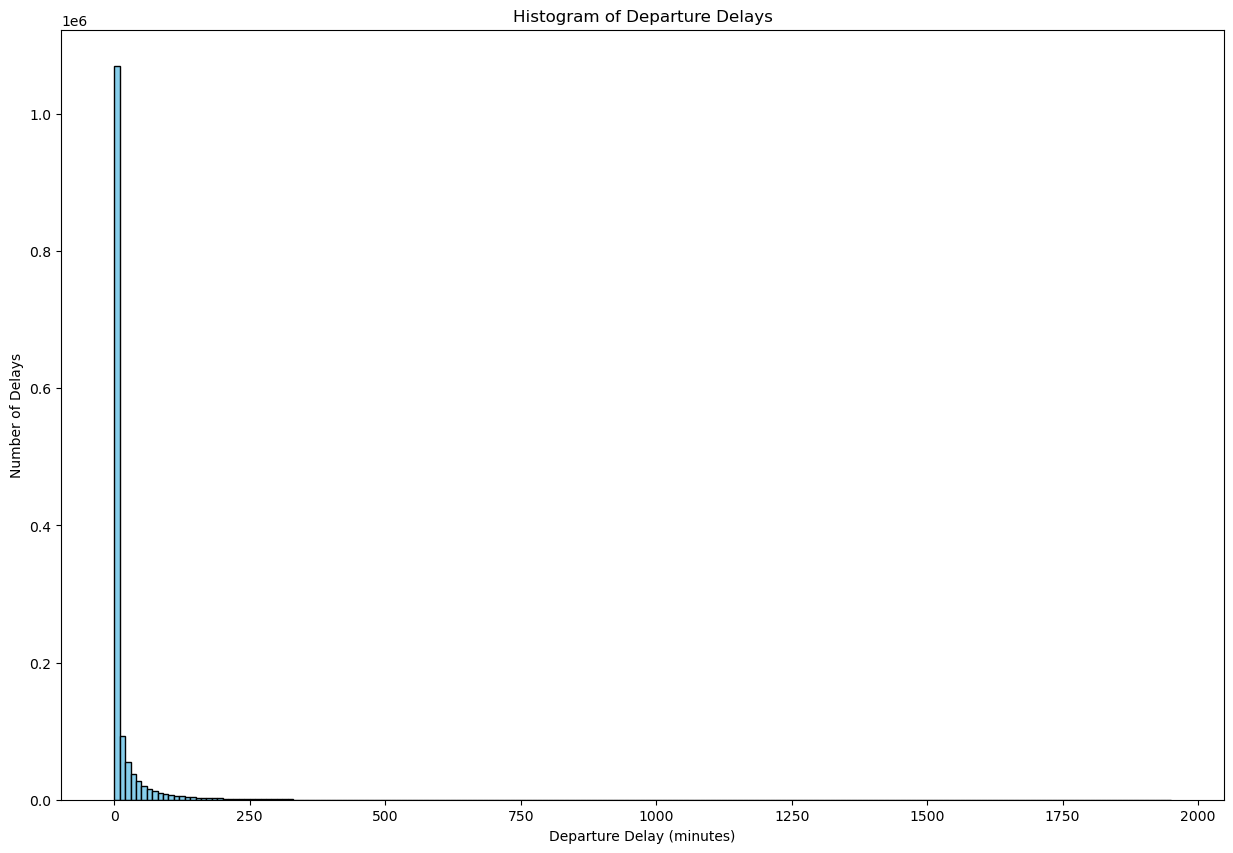

In [39]:
plt.figure(figsize=(15, 10))
plt.hist(dep_delay, bins=range(0, 1959, 10), color='skyblue', edgecolor='black')  
plt.ylabel('Number of Delays')
plt.xlabel('Departure Delay (minutes)')
plt.title('Histogram of Departure Delays')
plt.show()

In [40]:
dep_delay = dep_delay[dep_delay > 0]

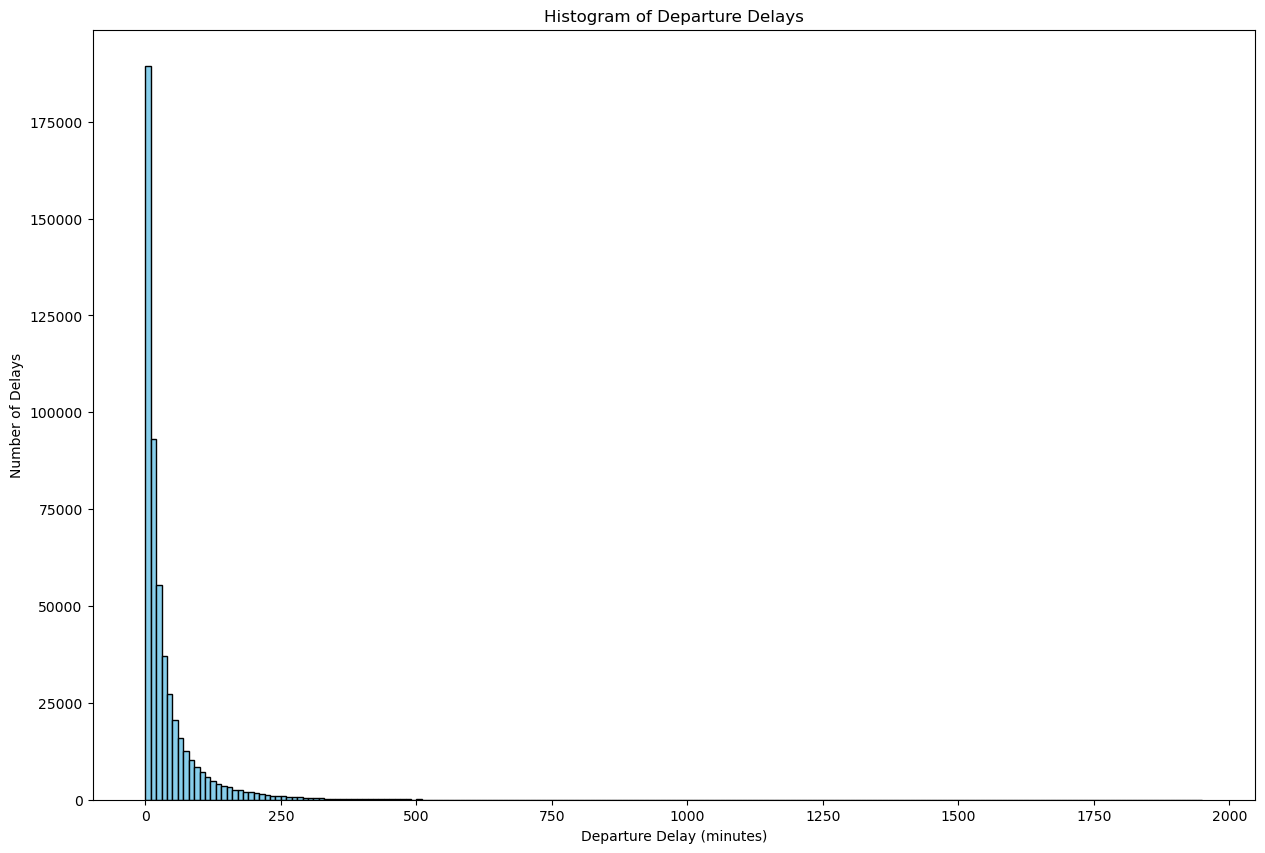

In [41]:
plt.figure(figsize=(15, 10))
plt.hist(dep_delay, bins=range(0, 1959, 10), color='skyblue', edgecolor='black')  
plt.ylabel('Number of Delays')
plt.xlabel('Departure Delay (minutes)')
plt.title('Histogram of Departure Delays')
plt.show()

In [42]:
dep_delay = dep_delay[(dep_delay > 0) & (dep_delay < 81)]

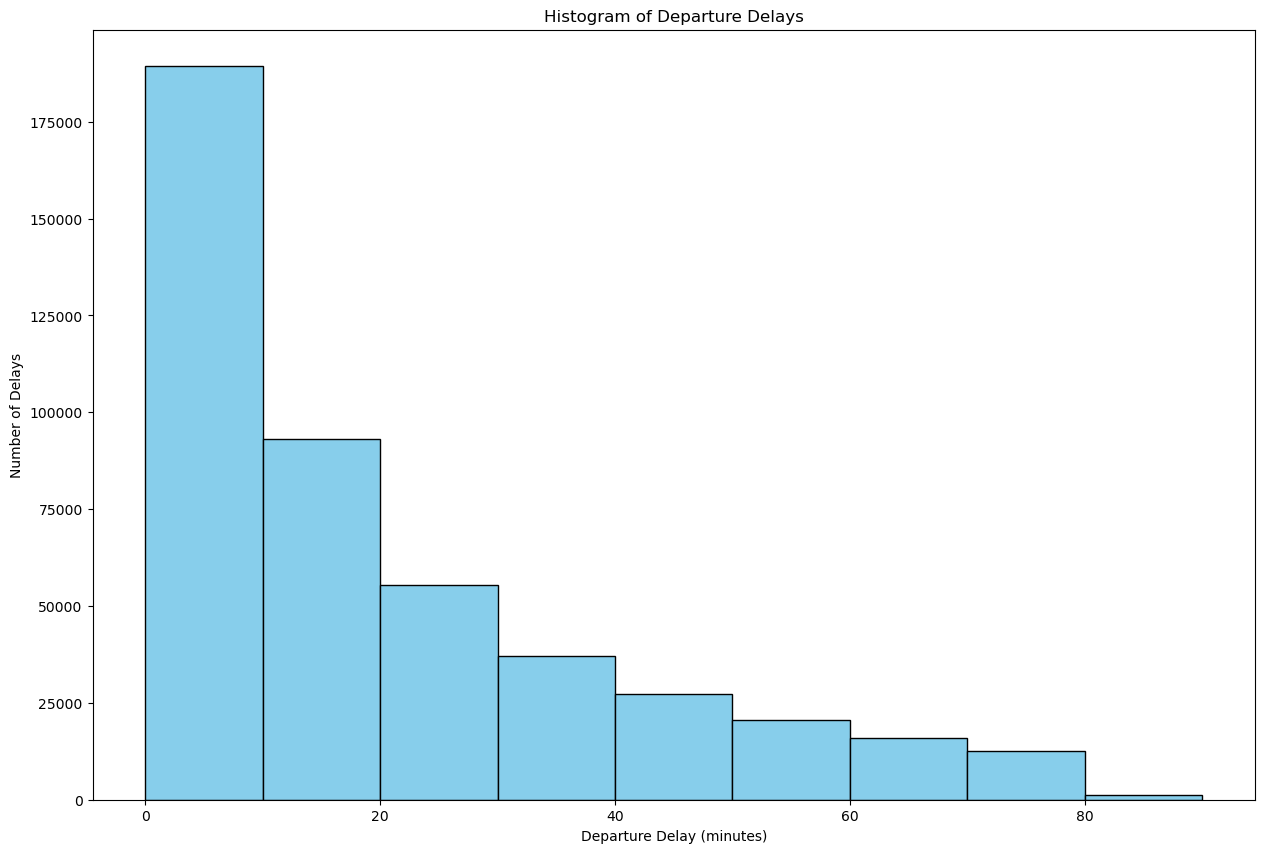

In [43]:
plt.figure(figsize=(15, 10))
plt.hist(dep_delay, bins=range(0, 100, 10), color='skyblue', edgecolor='black')  # Zmiana koloru i dodanie obramowania
plt.ylabel('Number of Delays')
plt.xlabel('Departure Delay (minutes)')
plt.title('Histogram of Departure Delays')
plt.show()

In [44]:
is_delayed = dep_delay[dep_delay > 15]

In [45]:
flight_df['is_delayed'] = dep_delay[dep_delay > 15]
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,NaN
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,NaN
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019,NaN
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,NaN
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770077,1770039,12,31,2,B6,N517JB,28,13204,11618,1037,...,144.0,937.0,4,126.0,0.0,0.0,0.0,11.0,2019,NaN
1770078,1770040,12,31,2,B6,N625JB,128,13204,11618,600,...,135.0,937.0,4,NaN,NaN,NaN,NaN,NaN,2019,NaN
1770079,1770041,12,31,2,B6,N807JB,428,13204,11618,2228,...,137.0,937.0,4,NaN,NaN,NaN,NaN,NaN,2019,NaN
1770080,1770042,12,31,2,B6,N523JB,733,13204,14843,1428,...,174.0,1189.0,5,184.0,0.0,7.0,0.0,0.0,2019,NaN


In [46]:
count = flight_df['id'].count()
count

1403326

In [47]:
filtered = flight_df[flight_df['is_delayed'].notnull()]
filtered

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed
5,6,1,20,7,WN,N298WN,2359,10397,11697,2000,...,97.0,581.0,3,0.0,0.0,0.0,0.0,28.0,2019,46.0
10,11,1,20,7,WN,N8568Z,3161,10397,12892,1910,...,302.0,1947.0,8,22.0,0.0,0.0,0.0,0.0,2019,30.0
15,16,1,20,7,WN,N7724A,4314,10397,12953,1535,...,135.0,762.0,4,0.0,0.0,0.0,0.0,59.0,2019,59.0
22,23,1,20,7,WN,N7714B,4036,10397,13204,1910,...,83.0,404.0,2,32.0,0.0,0.0,0.0,0.0,2019,39.0
34,34,1,20,7,WN,N7830A,3645,10397,15304,1350,...,76.0,406.0,2,20.0,0.0,0.0,0.0,4.0,2019,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770055,1770018,12,29,7,B6,N536JB,1933,13204,14843,2359,...,157.0,1189.0,5,16.0,0.0,0.0,0.0,0.0,2019,20.0
1770065,1770028,12,30,1,B6,N806JB,928,13204,11618,1319,...,175.0,937.0,4,0.0,0.0,52.0,0.0,0.0,2019,40.0
1770070,1770032,12,30,1,B6,N229JB,1433,13204,14843,2045,...,158.0,1189.0,5,60.0,0.0,0.0,0.0,0.0,2019,65.0
1770074,1770036,12,30,1,B6,N570JB,2133,13204,14843,1310,...,160.0,1189.0,5,41.0,0.0,0.0,0.0,7.0,2019,57.0


In [48]:
count_delayed = flight_df['is_delayed'].count()
count_delayed

200672

In [49]:
delayed_ratio = (count_delayed/count).round(2)
delayed_ratio

0.14

In [50]:
flight_df['is_delayed'] = 'FALSE'
flight_df.loc[flight_df['dep_delay'] > 15, 'is_delayed'] = 'TRUE'
flight_df_by_del = flight_df.groupby('is_delayed')
delayed_ratio = (round((flight_df_by_del['is_delayed'].count()[1]/flight_df.shape[0]),2))
delayed_ratio

0.19

In [51]:
flight_df['is_delayed'] = flight_df['is_delayed'].map({'TRUE': True, 'FALSE': False})

flight_delays_by_month_df = flight_df.groupby('month')['is_delayed'].mean()

print(flight_delays_by_month_df)

month
1     0.176760
2     0.218167
3     0.175514
4     0.185919
5     0.207114
6     0.253432
7     0.223028
8     0.213334
9     0.145889
10    0.167407
11    0.140907
12    0.208672
Name: is_delayed, dtype: float64


In [52]:
months_change = [0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
months_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

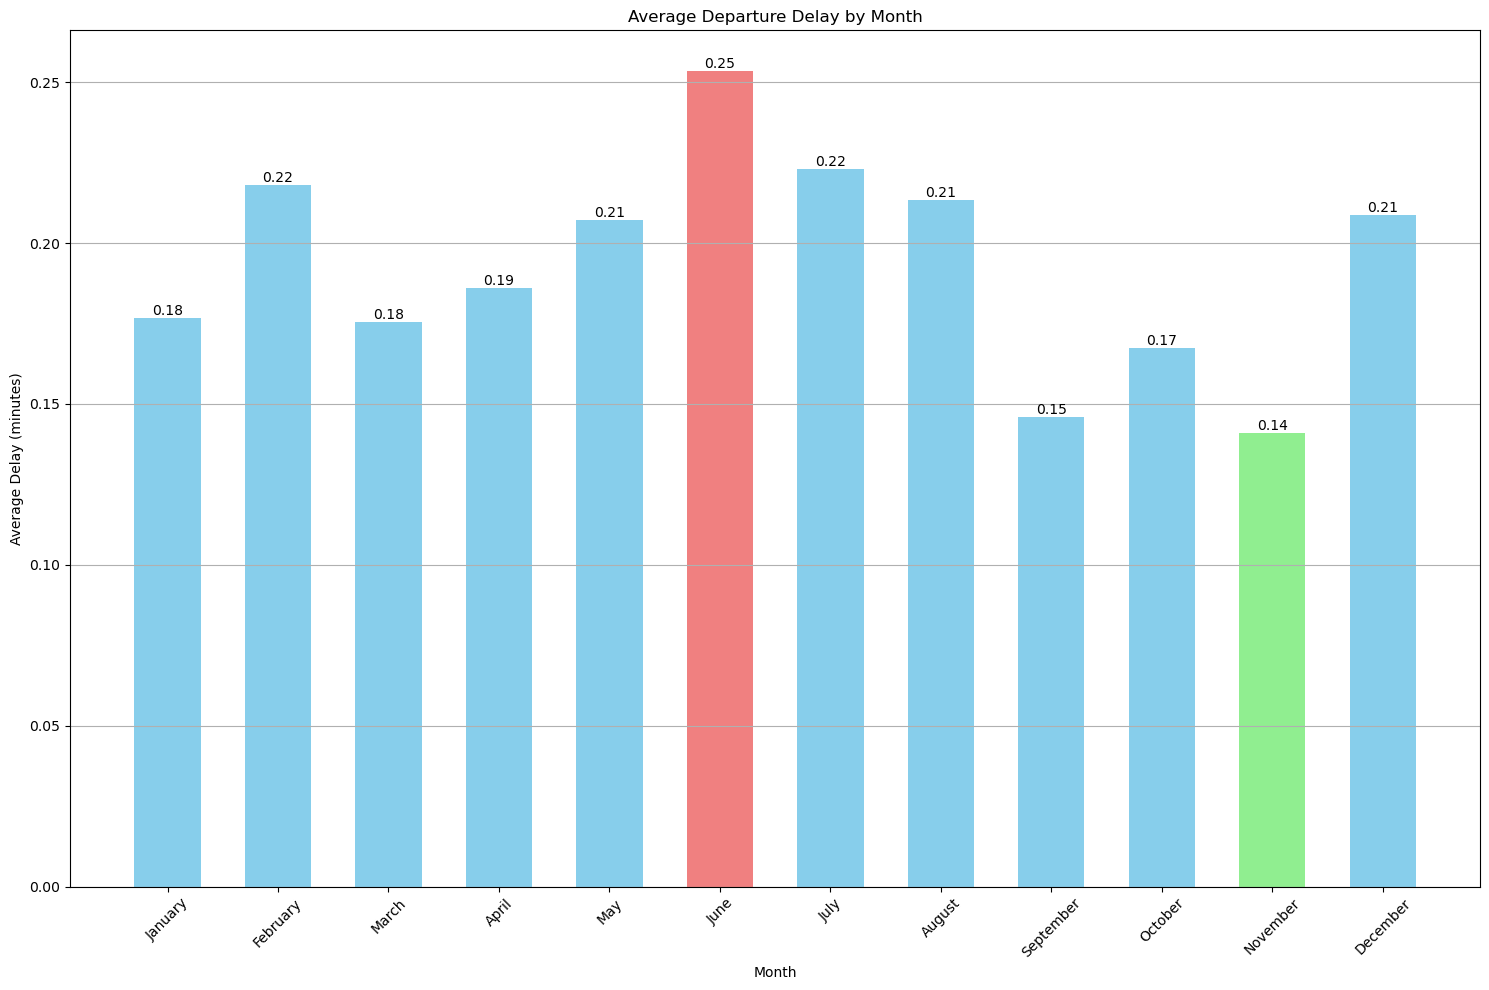

In [53]:
months_change = np.arange(1, 13) 
months_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

colors = ['skyblue'] * len(flight_delays_by_month_df)

max_index = np.argmax(flight_delays_by_month_df)
min_index = np.argmin(flight_delays_by_month_df)

colors[max_index] = 'lightcoral'  
colors[min_index] = 'lightgreen'  


plt.figure(figsize=(15, 10))
bars = plt.bar(months_change, flight_delays_by_month_df, color=colors, width=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(months_change, months_names, rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [54]:
flight_delays_by_weekday_df = flight_df.groupby('day_of_week')['is_delayed'].mean()
flight_delays_by_weekday_df

day_of_week
1    0.199924
2    0.176819
3    0.184456
4    0.214257
5    0.205310
6    0.171125
7    0.195679
Name: is_delayed, dtype: float64

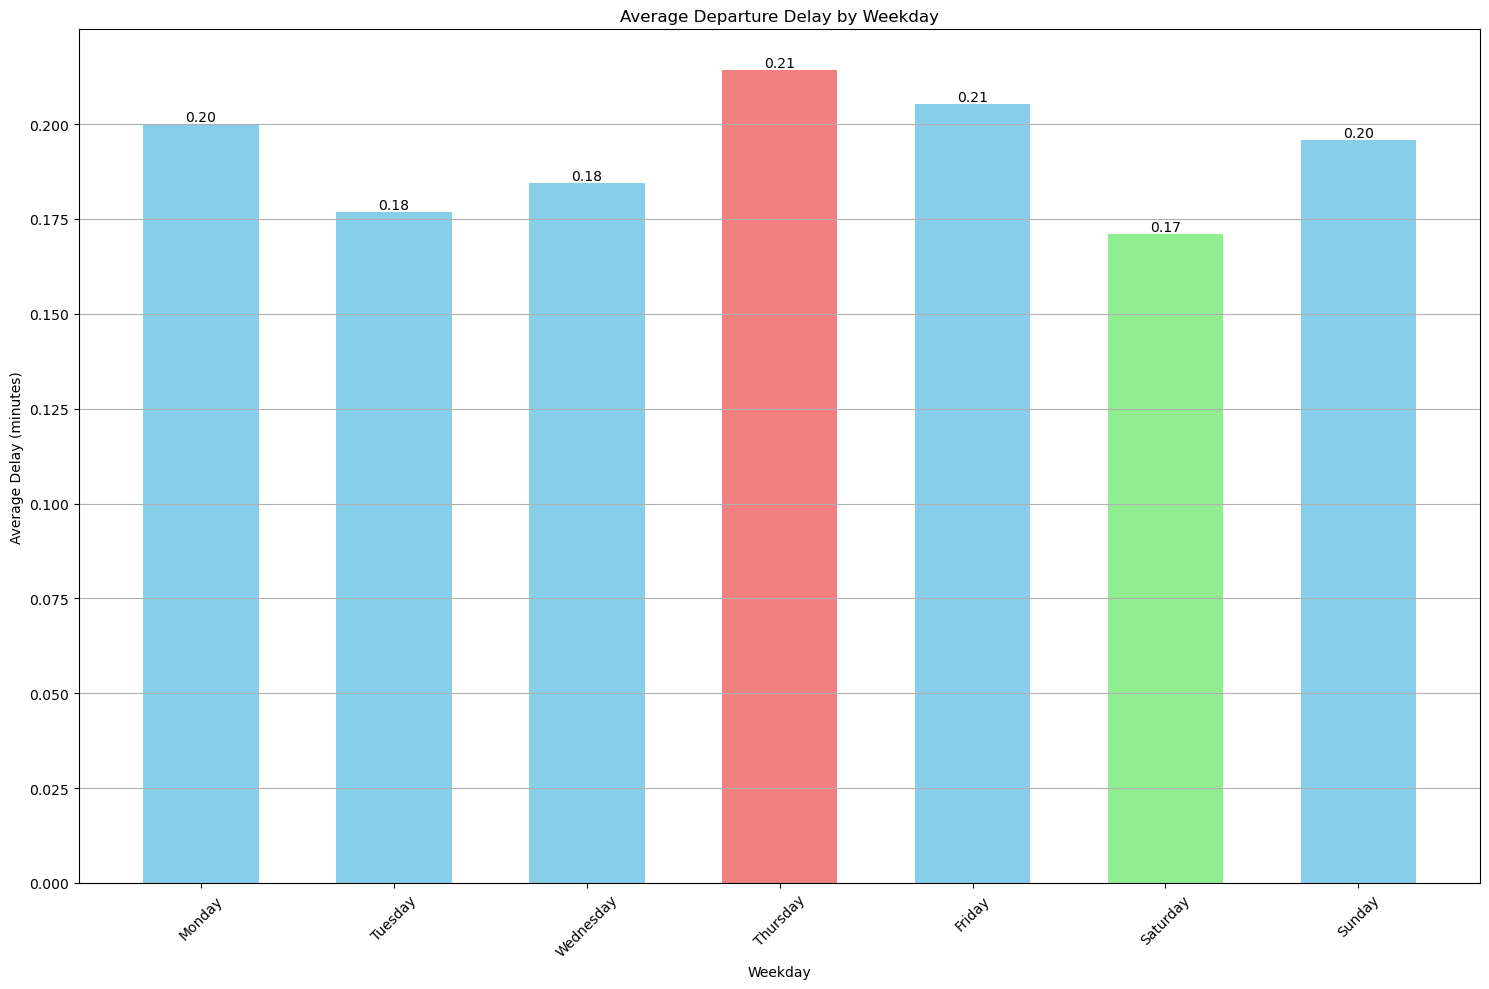

In [55]:
weekday_change = np.arange(1, 8) 
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

colors = ['skyblue'] * len(flight_delays_by_weekday_df)

max_index = np.argmax(flight_delays_by_weekday_df)
min_index = np.argmin(flight_delays_by_weekday_df)

colors[max_index] = 'lightcoral'  
colors[min_index] = 'lightgreen'  

plt.figure(figsize=(15, 10))
bars = plt.bar(weekday_change, flight_delays_by_weekday_df, color=colors, width=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Average Departure Delay by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Delay (minutes)')
plt.xticks(weekday_change, weekday_names, rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [56]:
flight_df['is_weekend'] = flight_df['day_of_week'].apply(lambda x: 6 if x == 6 else (7 if x == 7 else 0))
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,7
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,7
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019,False,7
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,7
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,581.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770077,1770039,12,31,2,B6,N517JB,28,13204,11618,1037,...,937.0,4,126.0,0.0,0.0,0.0,11.0,2019,True,0
1770078,1770040,12,31,2,B6,N625JB,128,13204,11618,600,...,937.0,4,NaN,NaN,NaN,NaN,NaN,2019,False,0
1770079,1770041,12,31,2,B6,N807JB,428,13204,11618,2228,...,937.0,4,NaN,NaN,NaN,NaN,NaN,2019,False,0
1770080,1770042,12,31,2,B6,N523JB,733,13204,14843,1428,...,1189.0,5,184.0,0.0,7.0,0.0,0.0,2019,True,0


In [57]:
flight_delays_by_weekend_df = flight_df.groupby('is_weekend')['is_delayed'].mean()
flight_delays_by_weekend_df 

is_weekend
0    0.196258
6    0.171125
7    0.195679
Name: is_delayed, dtype: float64

In [58]:
flight_df['is_weekend'] = flight_df['day_of_week'].isin([6, 7])
flight_delays_by_weekend_df = flight_df.groupby('is_weekend')['is_delayed'].mean().round(2)

In [59]:
flight_delays_by_weekend_df = flight_df.groupby('is_weekend')['is_delayed'].mean().round(2).reset_index()

print(flight_delays_by_weekend_df)
print(flight_delays_by_weekend_df.columns)

   is_weekend  is_delayed
0       False        0.20
1        True        0.18
Index(['is_weekend', 'is_delayed'], dtype='object')


In [60]:
flight_delays_by_weekend_df['is_weekend'] = flight_delays_by_weekend_df['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

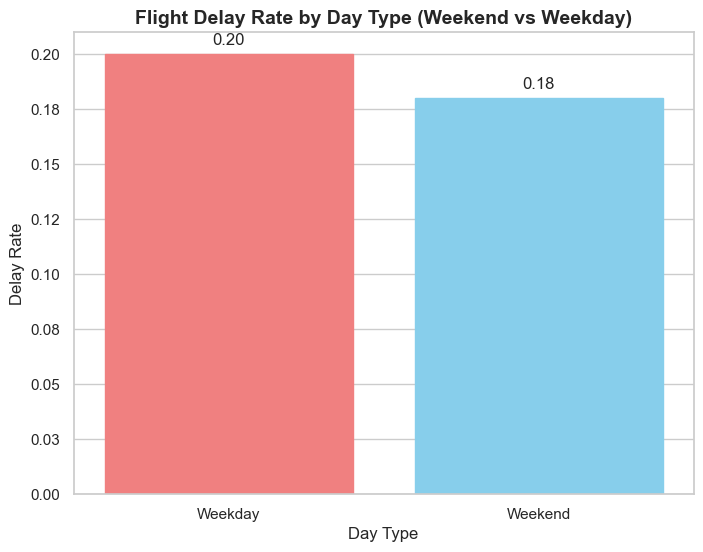

In [61]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='is_weekend', y='is_delayed', data=flight_delays_by_weekend_df, palette='viridis')

colors = ['skyblue' if x == 'Weekend' else 'lightcoral' for x in flight_delays_by_weekend_df['is_weekend']]
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

ax.set_xlabel('Day Type')
ax.set_ylabel('Delay Rate', fontsize=12)  
ax.set_title('Flight Delay Rate by Day Type (Weekend vs Weekday)', fontweight='bold', fontsize=14)  

ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [62]:
percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
flight_distance_analysis_df = round(flight_df['distance'].describe(percentiles=percentiles), 2)
flight_distance_analysis_df

count    1403326.00
mean         742.16
std          565.52
min          100.00
10%          226.00
25%          370.00
50%          606.00
75%          888.00
90%         1448.00
95%         1947.00
99%         2586.00
max         2586.00
Name: distance, dtype: float64

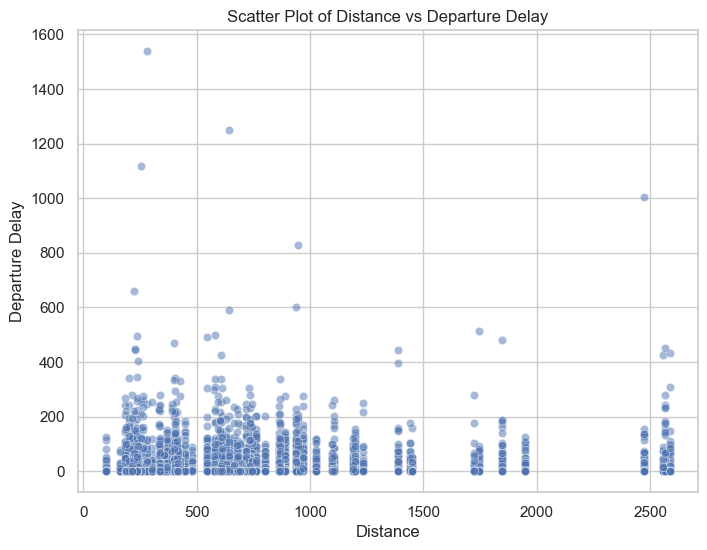

In [63]:
sample_df = flight_df.sample(n=10000, random_state=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance', y='dep_delay', data=sample_df,  alpha=0.5)

sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

plt.title('Scatter Plot of Distance vs Departure Delay')
plt.xlabel('Distance')
plt.ylabel('Departure Delay')
plt.show()

In [64]:
percentile_95 = flight_df['distance'].quantile(0.95)
percentile_95

1947.0

In [65]:
describe = flight_df['distance'].describe()
describe

count    1.403326e+06
mean     7.421640e+02
std      5.655167e+02
min      1.000000e+02
25%      3.700000e+02
50%      6.060000e+02
75%      8.880000e+02
max      2.586000e+03
Name: distance, dtype: float64

In [66]:
flight_df = flight_df[flight_df['distance'] <= percentile_95]
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019,False,True
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,581.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770077,1770039,12,31,2,B6,N517JB,28,13204,11618,1037,...,937.0,4,126.0,0.0,0.0,0.0,11.0,2019,True,False
1770078,1770040,12,31,2,B6,N625JB,128,13204,11618,600,...,937.0,4,NaN,NaN,NaN,NaN,NaN,2019,False,False
1770079,1770041,12,31,2,B6,N807JB,428,13204,11618,2228,...,937.0,4,NaN,NaN,NaN,NaN,NaN,2019,False,False
1770080,1770042,12,31,2,B6,N523JB,733,13204,14843,1428,...,1189.0,5,184.0,0.0,7.0,0.0,0.0,2019,True,False


In [67]:
max_distance = int(flight_df['distance'].max() // 100 * 100 + 100) 
bins = range(0, max_distance + 100, 100)
labels = [f'{i}-{i+99}' for i in bins[:-1]]

flight_df['distance_agg'] = pd.cut(flight_df['distance'], bins=bins, labels=labels, right=False)

C:\Users\m.owczarek\AppData\Local\Temp\ipykernel_25796\3187504273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df['distance_agg'] = pd.cut(flight_df['distance'], bins=bins, labels=labels, right=False)


In [68]:
flight_delays_by_distance_agg_df = flight_df.groupby('distance_agg')['is_delayed'].apply(lambda x: round(x[x == 1].count() / x.count(), 2))
flight_delays_by_distance_agg_df

C:\Users\m.owczarek\AppData\Local\Temp\ipykernel_25796\1316483960.py:1: RuntimeWarning: invalid value encountered in scalar divide
  flight_delays_by_distance_agg_df = flight_df.groupby('distance_agg')['is_delayed'].apply(lambda x: round(x[x == 1].count() / x.count(), 2))


distance_agg
0-99          NaN
100-199      0.12
200-299      0.19
300-399      0.19
400-499      0.17
500-599      0.17
600-699      0.20
700-799      0.23
800-899      0.21
900-999      0.24
1000-1099    0.20
1100-1199    0.20
1200-1299    0.21
1300-1399    0.25
1400-1499    0.16
1500-1599     NaN
1600-1699     NaN
1700-1799    0.21
1800-1899    0.27
1900-1999    0.20
Name: is_delayed, dtype: float64

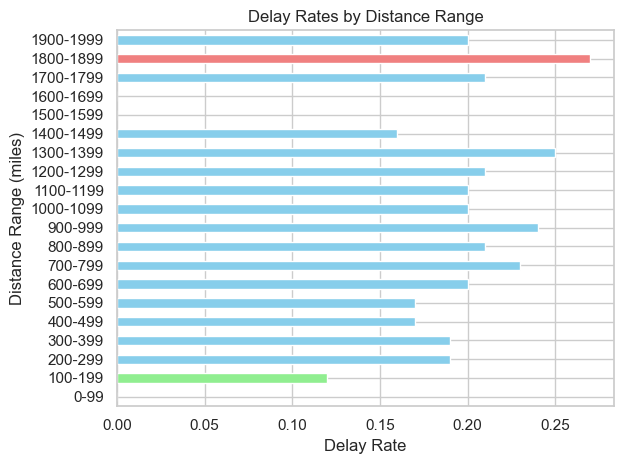

In [69]:
max_delay_rate = flight_delays_by_distance_agg_df.max()
min_delay_rate = flight_delays_by_distance_agg_df.min()

colors = ['skyblue' if val != max_delay_rate and val != min_delay_rate else 'lightcoral' if val == max_delay_rate else 'lightgreen' for val in flight_delays_by_distance_agg_df]

flight_delays_by_distance_agg_df.plot(kind='barh', title='Delay Rates by Distance Range', color=colors)

plt.xlabel('Delay Rate')
plt.ylabel('Distance Range (miles)')
plt.tight_layout()
plt.show()

In [70]:
flight_df['distance_group']

0          5
1          5
2          5
3          5
4          3
          ..
1770077    4
1770078    4
1770079    4
1770080    5
1770081    4
Name: distance_group, Length: 1333693, dtype: int64

In [71]:
flight_distance_by_distance_group = flight_df.groupby('distance_group')['distance'].agg(['min', 'max']).reset_index()
flight_distance_by_distance_group.columns = ['distance_group', 'min_distance', 'max_distance']

print(flight_distance_by_distance_group)

   distance_group  min_distance  max_distance
0               1         100.0         239.0
1               2         255.0         480.0
2               3         544.0         746.0
3               4         762.0         967.0
4               5        1024.0        1235.0
5               6        1389.0        1448.0
6               7        1721.0        1744.0
7               8        1846.0        1947.0


In [72]:
flight_delays_by_distance_group_df = flight_df.groupby('distance_group')['is_delayed'].apply(lambda x: round(x[x == 1].count() / x.count(), 2)).reset_index()
flight_delays_by_distance_group_df.columns = ['distance_group', 'delay_probability']

print(flight_delays_by_distance_group_df)

   distance_group  delay_probability
0               1               0.16
1               2               0.18
2               3               0.20
3               4               0.22
4               5               0.20
5               6               0.19
6               7               0.21
7               8               0.23


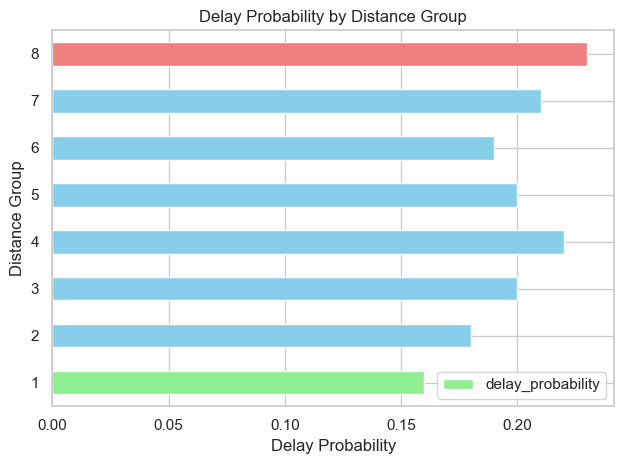

In [73]:
colors = ['skyblue'] * len(flight_delays_by_distance_group_df)
max_prob = flight_delays_by_distance_group_df['delay_probability'].max()
min_prob = flight_delays_by_distance_group_df['delay_probability'].min()

for i, val in enumerate(flight_delays_by_distance_group_df['delay_probability']):
    if val == max_prob:
        colors[i] = 'lightcoral'
    elif val == min_prob:
        colors[i] = 'lightgreen'

flight_delays_by_distance_group_df.plot(kind='barh', x='distance_group', y='delay_probability', color=colors, title='Delay Probability by Distance Group')

plt.xlabel('Delay Probability')
plt.ylabel('Distance Group')
plt.tight_layout()
plt.show()

In [74]:
table_name = 'aircraft'

aircraft_df = pd.read_sql_table(table_name, con=engine)
aircraft_df

,id,manufacture_year,tail_num,number_of_seats
0,1,1944,N54514,0.0
1,2,1945,N1651M,0.0
2,3,1953,N100CE,0.0
3,4,1953,N141FL,0.0
4,5,1953,N151FL,0.0
...,...,...,...,...
14761,14762,2019,N14011,337.0
14762,14763,2019,N16008,337.0
14763,14764,2019,N16009,337.0
14764,14765,2019,N2250U,276.0


In [75]:
aircraft_df = aircraft_df.drop_duplicates()
aircraft_df

,id,manufacture_year,tail_num,number_of_seats
0,1,1944,N54514,0.0
1,2,1945,N1651M,0.0
2,3,1953,N100CE,0.0
3,4,1953,N141FL,0.0
4,5,1953,N151FL,0.0
...,...,...,...,...
14761,14762,2019,N14011,337.0
14762,14763,2019,N16008,337.0
14763,14764,2019,N16009,337.0
14764,14765,2019,N2250U,276.0


In [76]:
duplicated_tail_nums = aircraft_df.duplicated(subset=['tail_num'], keep=False)
aircraft_df_duplicated = aircraft_df[duplicated_tail_nums]

aircraft_df = aircraft_df.sort_values(by=['tail_num', 'manufacture_year'], ascending=[True, False]) \
                         .drop_duplicates(subset='tail_num', keep='first')

print("\nDataFrame with duplicates (rows where tail_num has more than one year of production):")
print(aircraft_df_duplicated)

print("\nUpdated DataFrame (keeps only the most recent year of production for each tail_num):")
print(aircraft_df)


DataFrame with duplicates (rows where tail_num has more than one year of production):
          id  manufacture_year tail_num  number_of_seats
0          1              1944   N54514              0.0
1          2              1945   N1651M              0.0
2          3              1953   N100CE              0.0
3          4              1953   N141FL              0.0
4          5              1953   N151FL              0.0
...      ...               ...      ...              ...
14761  14762              2019   N14011            337.0
14762  14763              2019   N16008            337.0
14763  14764              2019   N16009            337.0
14764  14765              2019   N2250U            276.0
14765  14766              2019   N2749U            276.0

[14766 rows x 4 columns]

Updated DataFrame (keeps only the most recent year of production for each tail_num):
        id  manufacture_year tail_num  number_of_seats
3896  3897              2006   B708RE              9.0
1152  1

In [77]:
flight_df.head()

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,5,4.0,0.0,10.0,0.0,3.0,2019,False,True,1100-1199
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,3,NaN,NaN,NaN,NaN,NaN,2019,False,True,500-599


In [78]:
aircraft_df.head()

,id,manufacture_year,tail_num,number_of_seats
3896,3897,2006,B708RE,9.0
1152,1153,1996,CFEXB,0.0
1143,1144,1996,CFEXF,0.0
179,180,1987,CFEXH,0.0
203,204,1987,CFEXI,0.0


In [79]:
tmp_flight_df = pd.merge(flight_df, aircraft_df, on='tail_num', how='left')
tmp_flight_df

,id_x,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,id_y,manufacture_year,number_of_seats
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,NaN,NaN,NaN,2019,False,True,1100-1199,3822.0,2005.0,143.0
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,NaN,NaN,NaN,2019,False,True,1100-1199,6119.0,2016.0,175.0
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,10.0,0.0,3.0,2019,False,True,1100-1199,1517.0,1998.0,143.0
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,NaN,NaN,NaN,2019,False,True,1100-1199,1509.0,1998.0,143.0
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,NaN,NaN,NaN,2019,False,True,500-599,2224.0,2001.0,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333688,1770039,12,31,2,B6,N517JB,28,13204,11618,1037,...,0.0,0.0,11.0,2019,True,False,900-999,1998.0,2000.0,150.0
1333689,1770040,12,31,2,B6,N625JB,128,13204,11618,600,...,NaN,NaN,NaN,2019,False,False,900-999,3675.0,2005.0,150.0
1333690,1770041,12,31,2,B6,N807JB,428,13204,11618,2228,...,NaN,NaN,NaN,2019,False,False,900-999,5135.0,2012.0,150.0
1333691,1770042,12,31,2,B6,N523JB,733,13204,14843,1428,...,7.0,0.0,0.0,2019,True,False,1100-1199,2358.0,2001.0,150.0


In [80]:
raw_rows = tmp_flight_df.shape[0]  
df_wo_duplicates = tmp_flight_df.drop_duplicates()
rows = df_wo_duplicates.shape[0]
raw_rows

1333693

In [81]:
flight_df = tmp_flight_df.copy()

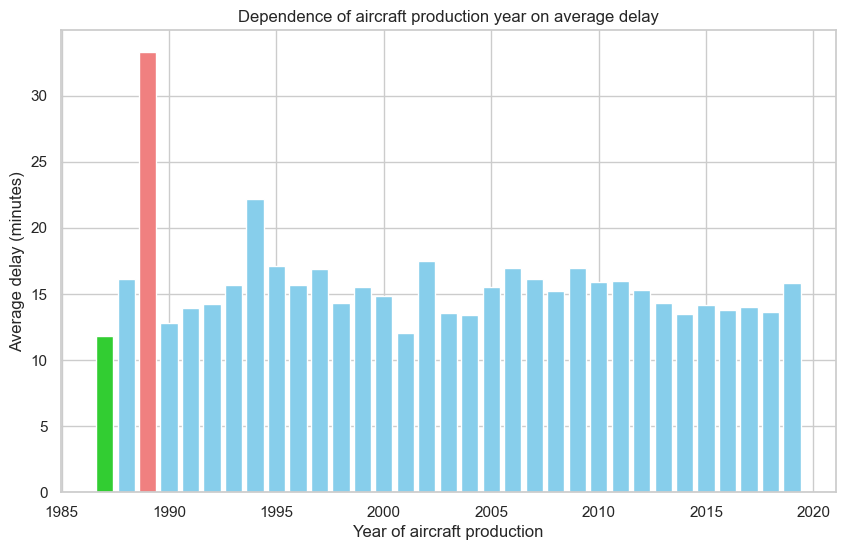

In [82]:
avg_delay_by_year = flight_df.groupby('manufacture_year')['dep_delay'].mean()

avg_delay_by_year = avg_delay_by_year.reset_index()

plt.figure(figsize=(10, 6))
colors = ['limegreen' if x == avg_delay_by_year['dep_delay'].min() else 'lightcoral' if x == avg_delay_by_year['dep_delay'].max() else 'skyblue' for x in avg_delay_by_year['dep_delay']]
plt.bar(avg_delay_by_year['manufacture_year'], avg_delay_by_year['dep_delay'], color=colors)
plt.xlabel('Year of aircraft production')
plt.ylabel('Average delay (minutes)')
plt.title('Dependence of aircraft production year on average delay')
plt.grid(True)
plt.show()

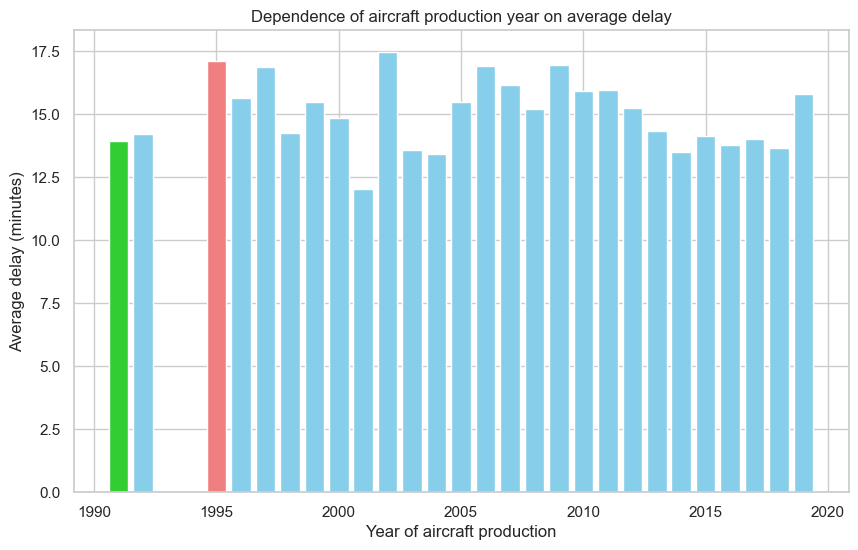

In [83]:
flight_counts_by_year = flight_df['manufacture_year'].value_counts()

years_over_10000_flights = flight_counts_by_year[flight_counts_by_year > 10000].index

avg_delay_by_year_filtered = flight_df[flight_df['manufacture_year'].isin(years_over_10000_flights)].groupby('manufacture_year')['dep_delay'].mean().reset_index()
plt.figure(figsize=(10, 6))
colors = ['limegreen' if x == avg_delay_by_year['dep_delay'].min() else 'lightcoral' if x == avg_delay_by_year['dep_delay'].max() else 'skyblue' for x in avg_delay_by_year['dep_delay']]
plt.bar(avg_delay_by_year_filtered['manufacture_year'], avg_delay_by_year_filtered['dep_delay'], color=colors)
plt.xlabel('Year of aircraft production')
plt.ylabel('Average delay (minutes)')
plt.title('Dependence of aircraft production year on average delay')
plt.grid(True)
plt.show()

In [84]:
def group_manufacture_year(year):
    return year - year % 3

flight_df['manufacture_year_agg'] = flight_df['manufacture_year'].apply(group_manufacture_year)

flight_delays_by_manufacture_year_agg_df = flight_df.groupby('manufacture_year_agg')['dep_delay'].mean().reset_index()
flight_delays_by_manufacture_year_agg_df

,manufacture_year_agg,dep_delay
0,1986.0,14.379603
1,1989.0,13.521451
2,1992.0,16.035739
3,1995.0,16.392106
4,1998.0,14.879419
5,2001.0,13.539431
6,2004.0,15.306528
7,2007.0,15.933416
8,2010.0,15.656130
9,2013.0,13.958223


In [85]:
delays_by_manufacture_year_df = flight_df['manufacture_year'].value_counts().reset_index()
delays_by_manufacture_year_df.columns = ['manufacture_year', 'flight_count']

top_manufactured_df = delays_by_manufacture_year_df.nlargest(5, 'flight_count')
top_manufactured_df 

,manufacture_year,flight_count
0,2001.0,121975
1,2016.0,83775
2,2017.0,77130
3,2000.0,73980
4,2015.0,73033


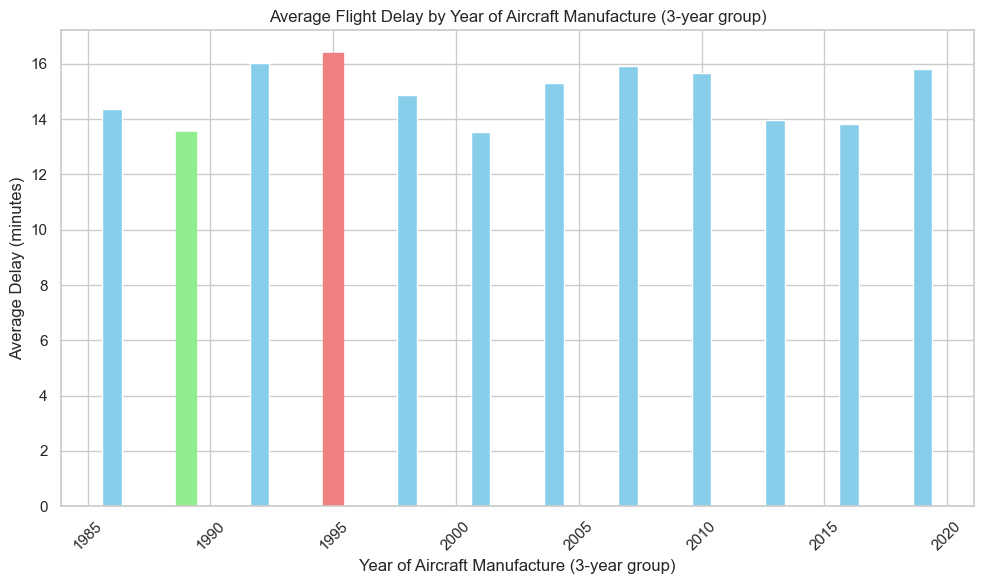

In [86]:
plt.figure(figsize=(10, 6))
max_delay_idx = flight_delays_by_manufacture_year_agg_df['dep_delay'].idxmax()
min_delay_idx = flight_delays_by_manufacture_year_agg_df['dep_delay'].idxmin()

bars = plt.bar(flight_delays_by_manufacture_year_agg_df['manufacture_year_agg'],
               flight_delays_by_manufacture_year_agg_df['dep_delay'],
               color='skyblue')

bars[max_delay_idx].set_color('lightcoral')

bars[min_delay_idx].set_color('lightgreen')

plt.xlabel('Year of Aircraft Manufacture (3-year group)')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Flight Delay by Year of Aircraft Manufacture (3-year group)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [87]:
manufacture_year_stats = flight_df.groupby('manufacture_year').agg(
    flight_count=('id','size'),            
    avg_delay=('dep_delay', 'mean')            
).reset_index()

manufacture_year_stats = manufacture_year_stats.sort_values(by='flight_count', ascending=False)

top_manufactured_df = manufacture_year_stats.nlargest(5, 'flight_count')


print("Top 5 roczników produkcji samolotów z największą liczbą lotów:")
print(top_manufactured_df[['manufacture_year', 'flight_count', 'avg_delay']])

KeyError: "Column(s) ['id'] do not exist"

In [ ]:
table_name = 'airport_list'

airport_list_df = pd.read_sql_table(table_name, con=engine)
airport_list_df

In [ ]:
unique_origin_airports_count = airport_list_df['origin_airport_id'].nunique()
unique_origin_airports_count

In [ ]:
flight_df = pd.merge(flight_df, airport_list_df, on='origin_airport_id', how ='left')
flight_df

In [ ]:
flight_df = pd.merge(flight_df, airport_list_df, on='origin_airport_id', how='left')

In [ ]:
flight_df.head(2)

In [ ]:
flight_df.rename(columns={'origin_city_name_y': 'destination_city_name'}, inplace=True)
flight_df.rename(columns={'origin_city_name_x': 'origin_city_name'}, inplace=True)

In [ ]:
flight_df.head(2)

In [ ]:
top_airports_origin_df = flight_df.groupby('origin_airport_id').size().reset_index(name='flight_count')
top_airports_origin_df.head(3)

In [ ]:
top_airports_destination_df = flight_df.groupby('dest_airport_id').size().reset_index(name='flight_count')
top_airports_destination_df.head(3)

In [ ]:
table_name = 'airport_weather'

airport_weather_df = pd.read_sql_table(table_name, con=engine)
airport_weather_df.head(2)

In [ ]:
selected_columns = ['station', 'name', 'date', 'prcp', 'snow', 'snwd', 'tmax', 'awnd']
airport_weather_df = airport_weather_df[selected_columns]
airport_weather_df.head(2)

In [ ]:
airport_list_df

In [ ]:
merged_df = pd.merge(airport_list_df, airport_weather_df, on = 'name', how='inner')
airport_weather_df = merged_df
airport_weather_df.drop(columns=['id', 'display_airport_name', 'origin_city_name'], inplace=True)
airport_weather_df

In [ ]:
airport_weather_df['date'] = pd.to_datetime(airport_weather_df['date'])

In [ ]:
airport_weather_df.head(2)

In [ ]:
flight_df.head(2)

In [ ]:
flight_df['date'] = pd.to_datetime(flight_df[['year', 'month', 'day_of_month']].astype(str).agg('-'.join, axis=1))
flight_df

In [ ]:
flight_df = flight_df.merge(
    airport_weather_df,
    left_on=['origin_airport_id', 'date'],
    right_on=['origin_airport_id', 'date'],
    how='left')

In [ ]:
print(flight_df.columns)


In [ ]:
Q1 = np.percentile(flight_df['tmax'], 25)
Q3 = np.percentile(flight_df['tmax'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = flight_df[(flight_df['tmax'] < lower_bound) | (flight_df['tmax'] > upper_bound)]
print("Outliers:")
print(outliers)

In [ ]:
grouped = flight_df.groupby('tmax')['is_delayed'].mean().reset_index()
grouped.columns = ['tmax', 'delay_rate']
print("Table of delay percentages based on maximum temperature:")
print(grouped)

In [ ]:
flight_df.to_csv('C:/Users/m.owczarek/coderslab/project/data/raw/flight_df_03.csv', index=False)

In [ ]:
flight_df.to_sql('flight_table', engine, if_exists='replace', index=False)

In [ ]:
#Creating views in SQL before creating the dashboard
#CREATE SCHEMA IF NOT EXISTS reporting;

#CREATE OR REPLACE VIEW reporting.flight AS
#SELECT
#    *,
#    CASE 
#        WHEN dep_delay_new > 0 THEN 1
#        ELSE 0
#    END AS is_delayed
#FROM
#    flight
#WHERE
#    cancelled = 0;

#CREATE OR REPLACE VIEW reporting.top_reliability_roads AS
#WITH flight_stats AS (
#    SELECT
#        rf.origin_airport_id,
#        al.display_airport_name AS origin_airport_name,
#        rf.dest_airport_id,
#        al.display_airport_name AS dest_airport_name,
#        rf.year,
#        COUNT(*) AS cnt,
#        AVG(CASE WHEN rf.dep_delay_new > 0 THEN 1 ELSE 0 END) AS reliability
#    FROM
#        reporting.flight rf
#    JOIN
#        airport_list al ON rf.origin_airport_id = al.origin_airport_id
#    GROUP BY
#        rf.origin_airport_id, al.display_airport_name, rf.dest_airport_id, al.display_airport_name, rf.year
#    HAVING
#        COUNT(*) > 10000
#),
#ranked_flights AS (
#    SELECT
#        origin_airport_id,
#        origin_airport_name,
#        dest_airport_id,
#        dest_airport_name,
#        year,
#        cnt,
#        reliability,
#        DENSE_RANK() OVER (PARTITION BY year ORDER BY reliability) AS nb
#    FROM
#        flight_stats
#)
#SELECT
#    origin_airport_id,
#    origin_airport_name,
#    dest_airport_id,
#    dest_airport_name,
#    year,
#    cnt,
#    reliability,
#    nb
#FROM
#    ranked_flights;

#CREATE OR REPLACE VIEW reporting.year_to_year_comparision AS
#SELECT
#    rf.year AS year,
#    rf.month AS month,
#    COUNT(*) AS flights_amount,
#    AVG(CASE WHEN rf.dep_delay_new > 0 THEN 1 ELSE 0 END) AS reliability
#FROM
#    reporting.flight rf
#GROUP BY
#    year,
#    month;

#CREATE OR REPLACE VIEW reporting.day_to_day_comparision AS
#SELECT
#    rf.year AS year,
#    rf.day_of_week AS day_of_week,
#    COUNT(*) AS flights_amount
#FROM
#    reporting.flight rf
#GROUP BY
#    rf.year,
#    rf.day_of_week;

#CREATE OR REPLACE VIEW reporting.day_by_day_reliability AS
#SELECT
#    TO_DATE(
#        rf.year::text || '-' ||
#        LPAD(rf.month::text, 2, '0') || '-' ||
#        LPAD(rf.day_of_month::text, 2, '0'),
#        'YYYY-MM-DD'
#    ) AS date,
#    AVG(CASE WHEN rf.dep_delay_new > 0 THEN 1 ELSE 0 END) AS reliability
#FROM
#    reporting.flight rf
#GROUP BY
#    rf.year,
#    rf.month,
#    rf.day_of_month;

In [ ]:
query = "SELECT * FROM reporting.top_reliability_roads"
top_routes_df = pd.read_sql(query, engine)

top_routes_df['reliability'] = top_routes_df['reliability'].apply(lambda x: f"{x:.2%}")

top_routes_df.rename(columns={
    'origin': 'Origin',
    'destination': 'Destination',
    'year': 'Year',
    'reliability': 'Reliability',
    'nb': 'Rank'
}, inplace=True)

top_10_routes_df = top_routes_df.sort_values(by='Rank').head(10)

top_10_routes_df


In [ ]:
query = "SELECT * FROM reporting.year_to_year_comparision"
your_comparision_df = pd.read_sql(query, engine)
your_comparision_df

In [ ]:
yoy_comparision_to_plot_df = your_comparision_df.pivot_table(index='month', columns='year', values='reliability')
yoy_comparision_to_plot_df.reset_index(inplace=True)
yoy_comparision_to_plot_df

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html

yoy_comparision_fig = px.bar(yoy_comparision_to_plot_df, x='month', y=[2019, 2020], barmode='group',
             labels={'variable': 'Year', 'value': 'Reliability', 'month': 'Month'},
             title='Reliability comparison: 2019 vs. 2020')

yoy_comparision_fig.update_layout(xaxis_title='Month', yaxis_title='Reliability', legend_title='Year')

In [ ]:
query = "SELECT * FROM reporting.day_to_day_comparision"
day_to_day_comparision_df = pd.read_sql(query, engine)
day_to_day_comparision_df

In [ ]:
day_to_day_comparision_to_plot_df = day_to_day_comparision_df.pivot_table(index='day_of_week', columns='year', values='flights_amount')
day_to_day_comparision_to_plot_df.reset_index(inplace=True)
day_to_day_comparision_to_plot_df

In [ ]:
day_to_day_comparision_fig = px.bar(day_to_day_comparision_to_plot_df, x='day_of_week', y=[2019, 2020], barmode='group',
             labels={'variable': 'Year', 'value': 'Flights amount', 'month': 'Month'},
             title='Number of flights: 2019 vs. 2020')

day_to_day_comparision_fig.update_layout(xaxis_title='Month', yaxis_title='Flights amount', legend_title='Year')

In [ ]:
query = "SELECT * FROM reporting.day_by_day_reliability"
day_by_day_reliability_df = pd.read_sql(query, engine)
day_by_day_reliability_df

In [ ]:
day_by_day_reliability_fig = px.line(day_by_day_reliability_df, x='date', y='reliability', color='year',
              labels={'date': 'Date', 'reliability': 'Reliability', 'year': 'Year'},
              title='Reliability: 2019 vs. 2020')

day_by_day_reliability_fig.update_layout(xaxis_title='Date', yaxis_title='Reliability', legend_title='Year')
day_by_day_reliability_fig.show()

In [ ]:
top_routes_dict = top_routes_df.to_dict('records')

top_routes_table = dash_table.DataTable(
    id='top-routes-table',
    columns=[{'name': col, 'id': col} for col in top_routes_df.columns],
    data=top_routes_dict,
    style_table={'overflowX': 'auto'},
    style_cell={'textAlign': 'left'},
    style_header={
        'backgroundColor': 'rgb(230, 230, 230)',
        'fontWeight': 'bold'
    }
)

In [ ]:
top_routes_page_title = html.H3(
    children='TOP 10 reliability routes in 2019 and 2020',
    style={'font-family': 'verdana', 'color': '#4444'}
)

In [ ]:
top_routes_layout = html.Div(children=[
    top_routes_page_title,  
    top_routes_table        
])

In [ ]:
yoy_comparision_component = dcc.Graph(
    id='yoy-comparision-graph',
    figure=yoy_comparision_fig
)

In [ ]:
day_to_day_comparision_fig = dcc.Graph(
    id='flights_amount-comparison',
    figure=day_to_day_comparision_fig
)

In [ ]:
yoy_comparision_component = dcc.Graph(
    id='yoy-comparision-graph',
    figure=yoy_comparision_fig
)

comparison_header = html.H1('Year over Year Comparison', style={'text-align': 'center'})

comparison_layout = html.Div([
    comparison_header,
    yoy_comparision_component
])

In [ ]:
day_by_day_comparision_component = dcc.Graph(
    id='day_by_day',
    figure=day_by_day_reliability_fig
)

comparison_header = html.H1('Day by day Comparison', style={'text-align': 'center'})

day_by_day_layout = html.Div([
    comparison_header,
    day_by_day_comparision_component
])

In [ ]:
top_routes_layout = html.Div(children=[
    top_routes_page_title, 
    top_routes_table        
])

yoy_comparision_component = dcc.Graph(
    id='yoy-comparision-graph',
    figure=yoy_comparision_fig
)

comparison_header = html.H1('Year over Year Comparison', style={'text-align': 'center'})

comparison_layout = html.Div([
    comparison_header,
    yoy_comparision_component
])

day_by_day_comparision_component = dcc.Graph(
    id='day_by_day',
    figure=day_by_day_reliability_fig
)

day_by_day_header = html.H1('Day by Day Comparison', style={'text-align': 'center'})

day_by_day_layout = html.Div([
    day_by_day_header,
    day_by_day_comparision_component
])

app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    html.Div([
        dcc.Link(html.Button('TOP report', style={'margin-right': '10px'}), href='/'),
        dcc.Link(html.Button('Comparison', style={'margin-right': '10px'}), href='/comparision_reporting'),
        dcc.Link(html.Button('Day by Day Reporting'), href='/day_by_day_reporting')
    ], style={'margin-bottom': '20px'}),
    html.Div(id='page-content')
])

@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname')]
)
def display_page(pathname):
    if pathname == '/comparision_reporting':
        return comparison_layout
    elif pathname == '/day_by_day_reporting':
        return day_by_day_layout
    else:
        return top_routes_layout

if __name__ == '__main__':
    app.run_server(debug=True)